# Definition of the optimization problem

We consider the following problem:
$$\underset{x\in \Omega}\min f(x)$$



We suppose that the function $f$ is continuously differentiable on $\Omega \subset \mathbb{R}^n$. We will sometimes assume that $f$ is quadratic, of positive definite Hessian or that $f$ is convex.

Remember, we have seen that convexity implies the uniqueness of an optimal solution.

In particular, we will study the Rosenbrock function of two variables to be minimized in $\mathbb{R}^2$
$$
 f(x_1,x_2)=p(x_2-x_1^2)^2+(1-x_1)^2 \mbox{, with p>1}
$$

This function is also called a banana function because it has a narrow range that looks like a banana. It has a global minimum in $x_1=x_2=1$.

We will see that only an efficient optimization method will allow to converge in a reasonable number of iterations to this optimum.




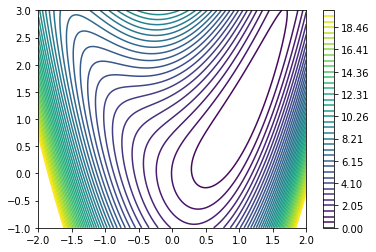

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x1,x2,p) :
    """Fonction de Rosenbrock a deux variables"""
    return p*(x2-x1**2)**2+(1-x1)**2

x1, x2 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-1,3,201))

#display contour
plt.contour (x1,x2,rosenbrock(x1,x2,1),np.linspace(0,20,40))
plt.colorbar()



## Optimal step gradient method


The most classical method for solving a multivariate numerical optimization problem is the steepest gradient method. It is also called the optimal gradient method. It comes from the following observation:

Let $f:\mathbb{R}^n \to \mathbb{R}$, $f \in C^1$

$-\nabla f(x_k)$ indicates the direction with the largest rate of decay of $f$ at the point $x_k$


**Algorithm**

$$x_{k+1}=x_k - \alpha_k \nabla f(x_k)$$

with a one-dimensional search on $\alpha$ to obtain the best possible point on the descent direction indicated by the opposite of the gradient.

$$\alpha_k = \arg\underset{\alpha_k >0} \min f(x_k-\alpha_k \nabla f(x_k)) $$

---

**Properties**

* $(x_{k+1}-x_k) \perp (x_{k}-x_{k-1}) $
* if $\nabla f(x_k) \neq 0$ then $f(x_{k+1})<f(x_k)$

**Proof**

In the computation of $\alpha_k$, if we find ${alpha_k}^*$ optimal, then the necessary condition of optimality of the linear search implies

$$\frac{d}{d\alpha}f(x_k-\alpha \nabla f(x_k))|_{\alpha=\alpha_k}=-\nabla f(x_{k+1})^T \nabla f(x_k) = 0 $$










**Case of quadratic functions**

If $f(x)=\frac{1}{2}x^TQx-b^Tx$ with $Q^T=Q>0$, compute $alpha_k$.

We can then easily calculate the parameter $\alpha^k$ from $\nabla f(x_{k+1})^T \nabla f(x_k) = 0$.


For a quadratic function, the gradient is :
$$\nabla f(x)= Qx-b$$

So we can develop :
$$\nabla f(x_{k+1})^T \nabla f(x_k) = 0$$

in
$$(Qx_{k+1}-b)^T(Qx_{k}-b) = 0$$

Now, it is enough to expand $x_{k+1}$ using the formula given by Newton's algorithm: $x_{k+1}= x_k-\alpha_k \nabla f(x)$ :

$$(Q(x_k-\alpha_k \nabla f(x))-b)^T(Qx_{k}-b) = 0$$

We develop again our gradient of $f(x)$ and we obtain


$$(Q(x_k-\alpha_k (Qx_{k}-b))-b)^T(Qx_{k}-b) = 0$$

And we develop :

\begin{align}
(Q x_k-b - \alpha_k Q(Qx^{k}-b)))^T(Qx_{k}-b) &= $0
(Q x_k-b)^T (Qx_{k}-b) - \alpha_k (Q(Qx_{k}-b))^T(Qx_{k}-b) &= 0\\\
(Q x_k-b)^T (Qx_{k}-b) &= \alpha_k (Qx_{k}-b)^TQ(Qx_{k}-b)&= \alpha_k
\alpha_k &= \frac{(Q x_k-b)^T (Qx_{k}-b)}{(Qx_{k}-b)^TQ(Qx_{k}-b)}
\end{align}

If we note $\Vert x \Vert^2=x^Tx$ and $\Vert x \Vert^2_Q=x^TQx$, we obtain

$$\alpha_k = \frac{\vert Q x_k-b-\vert^2 }{\vert Qx_{k}-b-\vert^2_Q}$$


**Optimum of a quadratic function**


$x^*=Q^{-1}b$ avec $\nabla f(x^*)=0$ et $H(x^*)=Q >0$


**Exercise 1

If f(x) is a quadratic function of the form $f(x) = \frac{1}{2}x^TQx - b^Tx$ with $Q=qI$ and $b$ whatever, how many iterations are needed to reach convergence ?

---

**A hint**, *remember the necessary condition of a minimum: a minimum is obtained for a null gradient and so for quadratic functions, we get a minimum in $x^*$ when $\nabla f(x^*) = Qx^* - b = 0$ and so by rearranging, we get
$$x^*=Q^{-1}b=\frac{1}{q}Ib=\frac{b}{q}$$*

$f(x) = \frac{1}{2}x^T(qI)x - b^Tx$

so
$f(x) = \frac{1}{2}qx^Tx-b^Tx $

and $\nabla f(x) = qx - b$.


We compute $\alpha_0$. For a quadratic function, we have shown that
$$\alpha_0 = \frac{\Vert Q x_0-b\Vert^2 }{\Vert Qx_{0}-b \Vert^2_Q}$$
By expanding:
$$\alpha_0 = \frac{(Q x_0-b)^T (Qx_{0}-b)}{(Qx_{0}-b)^TQ(Qx_{0}-b)}$$
And with Q=qI
$$\alpha_0 = \frac{(q x_0-b)^T (qx_{0}-b)}{q(qx_{0}-b)^T(qx_{0}-b)}$$
And so
$$\alpha_0 = \frac{1}{q}$$


Applying the algorithm for a given $x_0$, we can see that
$$ x_1=x_0-\alpha_0 \nabla f(x)$$
$$x_1=\frac{qx_0-b}{q}=-\frac{b}{q}=x^* $$






**Example 1**

For $f(x) = 5x_1^2+\frac{x_2^2}{2} - 3(x_1+x_2)$, $x_0=(-2,-7)$ and with a stopping criterion

$$\left |{\frac{f(x^k)-f(x^*)}{f(x^*)}} \right|leq10^{-3}$$

How many iteration steps are needed to reach convergence ?

1. Write the function in quadratic form
$f(x)=\frac{1}{2}  \begin{bmatrix}x_1& x_2\end{bmatrix}\begin{bmatrix}Q_{11} &Q_{12}\\ Q_{21}& Q_{22}\end{bmatrix}\begin{bmatrix}x_1\\ x_2\end{bmatrix}-\begin{bmatrix}b_1& b_2\end{bmatrix}\begin{bmatrix}x_1\\ x_2\end{bmatrix}$

If we develop

$A = \frac{1}{2}  \begin{bmatrix}x_1& x_2\end{bmatrix}\begin{bmatrix}Q_{11} &Q_{12}\\ Q_{21}& Q_{22}\end{bmatrix}\begin{bmatrix}x_1\\ x_2\end{bmatrix}$

then

$A = \frac{1}{2} (x_1(Q_{11}x_1 + Q_{12}x_2) + x_2(Q_{21}x_1 + Q_{22}x_2))$

and by expanding
$A = \frac{1}{2} (Q_{11}x_1^2 + Q_{12}x_1x_2 + Q_{21}x_2x_1 + Q_{22}x_2^2)$

By identification, we obtain for this function

$$Q = \begin{bmatrix}10 &0\\ 0& 1\end{bmatrix}$$

and
$$b = \begin{bmatrix}3\\\ 3\end{bmatrix}$$

2. If we take $x_0=(-2,-7)$, it will take 15 iterations to reach the optimum $x^*=(0.3,3)$.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def function_ex1(x,y) :
  return 5*x**2+ y**2/2-3*(x+y)

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = function_ex1(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


TypeError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
Q = np.array([[10,0],[0, 1]])
b = np.array ([3,3])

print((Q))
print (b)

print(np.linalg.inv(Q).dot(np.transpose(b)))



[[10  0]
 [ 0  1]]
[3 3]
[0.3 3. ]


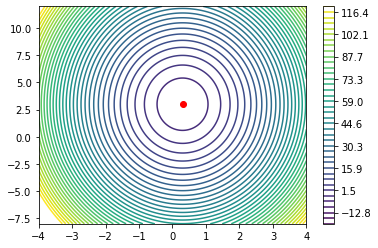

In [ ]:
x1, x2 = np.meshgrid(np.linspace(-4,4,201),np.linspace(-8,12,201))

#trace des lignes de niveaux
plt.contour (x1,x2,function_ex1(x1,x2),np.linspace(-20,120,40))
plt.colorbar()
plt.plot(0.3,3,'or')

**Exemple 2**
For $f(x) = x_1^2+\frac{x_2^2}{2} - 3(x_1+x_2)$, $x_0=(-2,-7)$ and with a stopping criterion

$$\left |{\frac{f(x^k)-f(x^*)}{f(x^*)}} \right|leq10{-3}$$

How many iteration steps are needed to reach convergence ?

1. Express the function in quadratic form
f(x)=frac{1}{2} x^TQx-bx^T$$
with

$$Q = \begin{bmatrix}2 &0\ 0& 1\end{bmatrix}$$

and
$$b = \begin{bmatrix}3\\ 3\end{bmatrix}$$


2. Starting from $x_0$=(-2,-7) and to go to the optimum $x^*=(1.5,3)$ it will take 4 iterations only.

valeur de la fonction a l'optimum f([1.5 , 3]) = -6.75


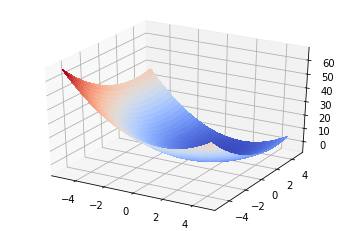

In [ ]:



def function_ex2(x,y) :
  return x**2+ y**2/2-3*(x+y)

print("valeur de la fonction a l'optimum f([1.5 , 3]) =",function_ex2(1.5,3))

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = function_ex2(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


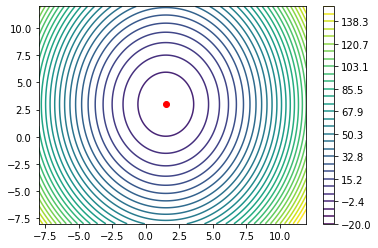

In [ ]:

x1, x2 = np.meshgrid(np.linspace(-8,12,201),np.linspace(-8,12,201))

#trace des lignes de niveaux
plt.contour (x1,x2,function_ex2(x1,x2),np.linspace(-20,150,30))
plt.colorbar()
plt.plot(1.5,3,'or')

You will notice that the optimum is much better seen with the level line view. But we have a better idea of the local minima in the surface view.

### Choice of the stopping criterion

In theory, we should choose as stopping criterion the arrival on zero gradient. But this would lead to too many iterations. So we will combine several stopping criteria.

In theory, we should stop the Newton algorithm when the gradient is zero.

**Possible criteria**

* $\Vert \nabla f(x_k)\Vert < \epsilon_1$
* $\left| \frac{f(x_{k+1})-f(x_k))}{f(x_k)}\right|<\epsilon_2$
* $|x_{k+1}-x_k|<\epsilon_3$



###  Evaluation of the gradient

Sometimes we cannot evaluate the values of the gradient from the analytical form of the derivatives of the function if

* Case 1 - $f\in C^1$, but the computation of $nabla f$ is too complicated
* Case 2 - $f \nabla f$ is known analytically but requires too much calculation for its evaluation
* Case 3 - $f \notin C^1$

**Case 1 and Case 2**

If the $f \notin C^1$ is known analytically, we will use an approximation of $f \nabla f$ using finite differences.

$$ \frac{\partial f}{\partial x_i}(x) \approx \frac{f(x+hu_i)-f(x)}{h} \mbox {, avec } u_i = \begin{bmatrix} 0 \\ \vdots \\ 0 \\1 \\ 0 \\ \vdots \\0 \end{bmatrix}\mbox{ et i correspond à la ième ligne}$$

**Case 3**

if $f \notin C^1$, then you must go to another method.

## Fixed step gradient method

A common variant of the optimal step gradient algorithm is the constant step gradient algorithm. It does not vary $\alpha$ and thus avoids the linear search.


**Algorithm**

$$x_{k+1}=x_k - \alpha \nabla f(x_k)$$

with

$$\alpha >0 $$


# Methods of conjugate directions

This method solves quadratic problems in $n$ iterations.

It has a faster convergence speed than the gradient.

**Warning! Only for quadratic functions**



## Q-conjugate directions

**Definitions**

Let $Q$ be an n×n symmetric matrix, positive definite $Q=Q^T>0$.


We say that two vectors $x$ and $y$ of $\mathbb{R}^n$ are
**Q-conjugate** (or conjugate with respect to Q) if they satisfy
$$ x^TQy=0 $$.

The directions $d_1 \dots d_n$ are **Q-conjugate** if
$$d_i^TQd_j=0, \forall i \neq j$$


The matrix Q being positive definite, the bilinear form
form $q(x,y) = x^TQy$ defines a scalar product and this
relation translates the orthogonality of the vectors $x$ and $y$ for this scalar product.

## Algorithm




Consider a **quadratic function** $f(x) =\frac{1}{2}x^TQx-b^Tx$.

It is easy to show that
$$ \nabla f = Qx -b$$
and
$$x^* = Q^{-1}b$$

The idea of the method is to iteratively construct directions
$d_0, d_dots, d_k$ mutually conjugate. At each iteration $k$ the direction
$d_k$ is obtained as a linear combination of the gradient in $x_k$ and the previous direction
previous direction $d_{k-1}$, the coefficients being chosen in such a way that
$d_k$ is conjugate with all previous directions.

Let $n$ directions be conjugate $d_0 \dots d_{n-1}$

* We choose a $x_0$ and a descent direction $d_0=-\nabla f(x_0)$

* At iteration $k$
$$x_{k+1}=x_{k}+\alpha_k d_k$$
with
$$\alpha_k = \arg \underset{\alpha \geq 0}\min f(x_k+\alpha d_k) = - \frac{{d_k}^T\nabla f(x_k)^T}{{\Vert d_k \Vert ^2 _Q}}$$

* Then we update the new direction $d_{k+1}$

$$
d_{k+1} = \nabla f(x_{k+1})- \beta_k d_{k}
$$

with $$\beta_{k} = \frac{{d_k}^T Q \nabla f(x_{k+1})}{\vert d_k \vert ^2 _Q}$$


## Demonstration

If we note $x^*$ the solution of Qx=b and if we have a family of $Q$-conjugate vectors forming a basis of $\mathbb{R}^n$, then, we can express $x$ in this basis

$$x= \sum^{n-1}_{j=0} \alpha_j d_j$$

If we multiply on the left by $d_i^TQ$, we obtain
\begin{align}
d_i^T Q x &= d_i^T Q \sum^{n-1}_{j=0} \alpha_j d_j
d_i^T Q x &= \sum^{n-1}_{j=0} \alpha_j d_i^T Q d_j \mbox{, this term is null except for } i=j \\\
d_i^T Q x &= \alpha_i d_i^T Q d_i
d_i^T Q x &= \alpha_i d_i \Vert_Q^2
\end{align}

and for $x=x^*$, we find

\begin{align}
   {d_i}^T Q x^* &= \alpha_i \Vert d_i \Vert^2
   {d_i}^T b & == \alpha_i \Vert d_i \Vert^2\\\
\end{align}

and therefore the value of $\alpha_i$

$$\alpha_i = \frac{{d_i}^T b}{ \Vert d_i \Vert^2}$$


##Exercice

Let
$f(x)=\frac{1}{2} x^TQx-b^Tx$ avec $Q =\begin{bmatrix}10& 0 \\ 0& 1\end{bmatrix}$ et $ b = \begin{bmatrix}3
 \\ 3\end{bmatrix}$

 Apply conjuguate direction algo from $x_0=(-2,-7)$ until $x_2$

In [ ]:
import numpy as np

## In this example, I try to do all the steps one by one
## without loop and without function to show you all the steps of the
## method.
## I let you do the algo properly, as seen in the last tutorial.

#We choose an x_0 and a descent direction $d_0=-\nabla f(x_0)$.

# we start from x0
print ("parametres initiaux : " )
x0 = np.array([-2,-7], int)
print(x0)

# on definit les caractéristiques de notre fonction
Q = np.array([[10, 0] ,  [0, 1]])
b = np.array([3 ,  3])

print ("cout initial : " )
fx0 = 1/2* (x0.dot(Q)).dot(x0) - b.dot(x0)
print(fx0)

# on exprime le gradient en x0
grad_f_x0 = Q.dot(x0)-b
print ("gradient initial : " )
print (grad_f_x0)

# on en déduit une direction de descente initiale
d0 = -grad_f_x0
print ("direction initiale : " )
print(d0)

# on calcul le pas a effectuer dans la direction de descente
print ("pas initial : " )
alpha0 = -d0.dot(grad_f_x0)/((d0.dot(Q)).dot(d0))
print(alpha0)

# on en déduit
print ("parametres au pas 1 : " )
x1=x0+alpha0*d0
print(x1)

print ("cout a l'iteration 1  : " )
fx1 = 1/2* (x1.dot(Q)).dot(x1) - b.dot(x1)
print(fx1)


# Puis on met a jour la nouvelle direction $d_{k+1}$

#d_{k+1} = \nabla f(x_{k+1})- \beta_k dk
print ("gradient a l'iteration 1  : " )
grad_f_x1 = Q.dot(x1)-b
print(grad_f_x1)

# beta pour que les directions soient Q conjuguées
print ("coefficient rectificateur initial beta0 " )
beta0 = (d0.dot(Q)).dot(grad_f_x1)/((d0.dot(Q)).dot(d0))
print(beta0)

# on en deduit la nouvelle direction de descente
print ("direction a l'iteration 1 : " )
d1 = -grad_f_x1+ beta0*d0
print(d1)

####### ET ON RECOMMENCE ################

# et on calcul alpha 1
print ("pas a l'iteration 1  : " )
alpha1 = -d1.dot(grad_f_x1)/((d1.dot(Q)).dot(d1))

# on en déduit x2
print ("parametres a l'iteration 2  : " )
x2=x1+alpha1*d1
print(x2)


print ("cout a l'iteration 2  : " )
fx2 = 1/2* (x2.dot(Q)).dot(x2) - b.dot(x2)
print(fx2)

# Puis on met a jour la nouvelle direction $d_{k+1}$

#d_{k+1} = \nabla f(x_{k+1})- \beta_k
print ("gradient a l'iteration 1  : " )
grad_f_x2 = Q.dot(x2)-b
print(grad_f_x2)


print ("le gradient est nul, donc, on a atteint l'optimum " )



parametres initiaux : 
[-2 -7]
cout initial : 
71.5
gradient initial : 
[-23 -10]
direction initiale : 
[23 10]
pas initial : 
0.11669758812615956
parametres au pas 1 : 
[ 0.68404453 -5.83302412]
cout a l'iteration 1  : 
34.79860853432281
gradient a l'iteration 1  : 
[ 3.84044527 -8.83302412]
coefficient rectificateur initial beta0 
0.14749019864312743
direction a l'iteration 1 : 
[-0.4481707  10.30792611]
pas a l'iteration 1  : 
parametres a l'iteration 2  : 
[0.3 3. ]
cout a l'iteration 2  : 
-4.949999999999999
gradient a l'iteration 1  : 
[2.66453526e-15 0.00000000e+00]
le gradient est nul, donc, on a atteint l'optimum 


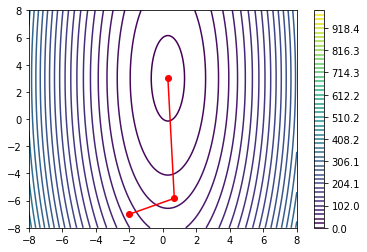

In [ ]:
#Affichage du résultat

def fquad(x) :
  Q = np.array([[10, 0] ,  [0, 1]])
  b = np.array([3 ,  3])
  if np.size(x)==2:
    return 1/2* (x.dot(Q)).dot(x) - b.dot(x)

def f2(x1,x2) :
    """Fonction de l'exemple2 """
    return 5*x1**2+x2**2/2 - 3*(x1+x2)

x, y = np.meshgrid(np.linspace(-8,8,201),np.linspace(-8,8,201))
#trace des lignes de niveaux
plt.contour (x,y,f2(x,y),np.linspace(0,1000,50))
plt.colorbar()
xn = np.array([x0,x1,x2])
plt.plot(xn[:,0],xn[:,1],'r-o')

# Sum of Squares, Nonlinear Equations

We aim to solve problems like:

$$
f(x) = \frac{1}{2} \sum_{i=1}^{m} f_i(x)^2 = \frac{1}{2} F(x)^T F(x)
$$

where:

$$
F(x) = \begin{bmatrix} f_1(x) \\ \vdots \\ f_m(x) \end{bmatrix}
$$

and either the Jacobian:

$$
J(x) = \begin{bmatrix} \nabla f_1(x)^T \\ \vdots \\ \nabla f_m(x)^T \end{bmatrix}
$$

We can write the gradient of \( f \) as:

$$
\nabla f(x) = \sum_{i=1}^{m} f_i(x) \nabla f_i(x) = J(x)^T F(x)
$$

and the Hessian as:

$$
H(x) = J(x)^T J(x) + \sum_{i=1}^{m} f_i(x) H_i(x)
$$

---

## Newton's Methods

This algorithm is the multidimensional generalization of the Newton-Raphson method, applied to finding the roots of $ \nabla f $.

This method works very well for small-dimensional problems (a few dozen variables) and when the Hessian calculation is straightforward.

In other cases, another method, such as conjugate gradients, is preferred.

Let $ f: \mathbb{R}^n \to \mathbb{R} $, $ f \in C^2 $.

If we expand $ f $ near $ x_0 $ using a second-order Taylor expansion, we get:

$$
f(x_0) \approx f(x_0) + \nabla f(x_0)(x - x_0) + \frac{1}{2} (x - x_0)^T H(x_0) (x - x_0)
$$

Thus, if the Hessian is positive for \( x_k \), we get the update rule:

$$
x_{k+1} = x_k - H(x_k)^{-1} \nabla f(x_k)
$$

which can also be written as:

$$
x_{k+1} = x_k - H(x_k)^{-1} J(x_k)^T F(x_k)
$$

---

### Caution:
This syntax implies that we are inverting the Hessian, which is not always necessary.

---

For a **quadratic function**, convergence can be proven in a single iteration.

---

### Caution:
This method can easily converge to local maxima or saddle points, as it only seeks to satisfy the necessary optimality condition $ \nabla f = 0 $.


## Méthode de Gauss Newton

if $\underset{x^k \to x^*} \lim f(x_k) = 0 $ then $\underset{x_k \to x^*} \lim H(x_k) \to J (x_k)^T J (x_k)$

And we can write the Gauss Newton algorithm. This allows us not to evaluate the Hessian, which can sometimes be very costly.
$$x_{k+1} = x_{k}- \alpha_k (J (x_k)^T J (x_k))^{-1}J(x_k)^T F(x_k)$$

This algorithm has a quadratic convergence if $f(x^*)=0$ and $J(x^*)$ are non singular.

**Problème** if J is singular or ill conditionned.

## Levenberg Marquardt Method

This method combines Gradient and Newton's method.

We define a new matrix $ H $ which is the Hessian plus a diagonal matrix corresponding to a certain gain $ v^k $, where $ v^k $ is a regularization term to ensure the Hessian is positive.

$$
H_k = H(x_k) + v_k I
$$

$$
x_{k+1} = x_{k} - \alpha_k {H_k}^{-1} \nabla f(x_k)
$$

It can also be approximated by

$$
x_{k+1} = x_{k} - \alpha_k {(J(x_k)^T J(x_k) + v_k I)}^{-1} \nabla f(x_k)
$$

$$
x_{k+1} = x_{k} - \alpha_k {(J(x_k)^T J(x_k) + v_k I)}^{-1} J(x_k)^T F(x_k)
$$

---

### **Algorithm**

Let $ x_0, v_0, \nabla f(x_0), H_0(x_0) $

1. $ H_k = H(x_k) + v_k I $
2. If $ H_k \leq 0 $, then $ v_k = c_0 v_k $ and return to step 1.
3. $ x_{k+1} = x_{k} - \alpha_k {H_k}^{-1} \nabla f(x_k) $


# Nelder-Mead Simplex

This is a purely geometric method.

The simplex descent method is also known as the Nelder-Mead method. The idea is to use a mobile simplex in the definition space to enclose the optimal point, then shrink the simplex until its dimensions reach a given error tolerance.

In the $n$-dimensional space, a simplex is a shape with $n+1$ vertices connected by straight lines and enclosed by polygonal faces. If $n = 2$, a simplex is a triangle; if $n = 3$, it is a tetrahedron.

By applying movements in an appropriate sequence, the simplex can always converge toward the minimum point, enclose it, and then shrink around it. The direction of a movement is determined by the values of $f(x)$ (the function to be minimized) at the vertices. The vertex with the highest value of $f$ is marked as $x_h$, and the vertex with the lowest value is marked as $x_l$. The amplitude of a movement is controlled by the distance $d$, measured from $x_0$ to the centroid of the opposite face (in the case of a triangle, the midpoint of the opposite side).

**Definition**  
A simplex is a geometric shape with $n+1$ vertices in an $n$-dimensional space.

It is called a regular simplex if the vertices $x_i$ are equidistant.

**Algorithm Principle**

* Evaluate the cost function for each vertex $f(x_i)$.
* Find $x_h = \arg \underset{x_i}{\max} f(x)$.
* Find the mirror $x_r$ of $x_h$.
* Move in the direction of $x_r$: reflection, expansion, or contraction depending on the case.

## Reflection (n=2)

$$
x_h = \arg \underset{x_i}{\max} f(x)
$$

$$
x_r = x_0 + \alpha (x_0 - x_h) = (1 + \alpha) x_0 - \alpha x_h
$$

$$
x_0 = \frac{1}{n} \sum_{\underset{i \neq h}{i=1}}^n x_i
$$

and $\alpha > 0 | \alpha = \frac{\Vert x_r - x_0 \Vert}{\Vert x_h - x_0 \Vert}$


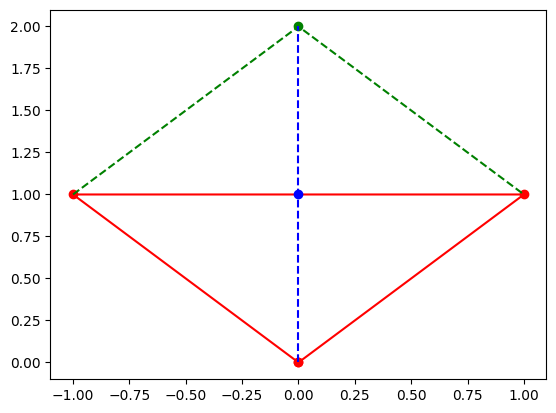

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xn = np.array( [[0,0],[-1,1], [1,1], [0,0]]) # points initiaux

# reflexion
xh = xn[0] # let us assume that the first points is the worst
x0 = (xn[1]+xn[2])/2
alpha = 1
xr = x0 + alpha*(x0-xh)

# pour le tracé
xb = np.array([xn[0], x0, xr])
xg = np.array([xn[1], xr , xn[2]])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(x0[0],x0[1],'bo')
plt.plot(xr[0],xr[1],'go')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xb[:,0],xb[:,1],'b--')
plt.show()


## Contraction (n=2)

* if $f(x_r) > f(x_i) \forall i \neq h$, reject $x_r$
* compute $x_c = \beta x_h +(1- \beta) x_0$ wiht $ 0 \leq \beta \leq 1$ and
$\beta = \frac{\Vert x_c-x_0 \Vert}{x_h-x_0}$
* if $f(x_c) < \min(f(x_h),f(x_r))$ then $x_c$ remplace $x_r$, else replace $x_i$ by
$$x_i=\frac{x_i + \arg \underset{x_i}\min f(x)}{2}$$

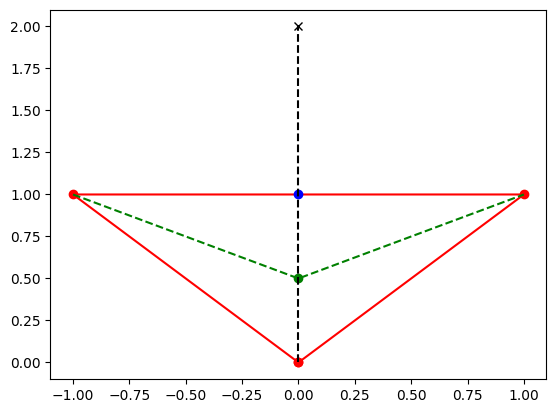

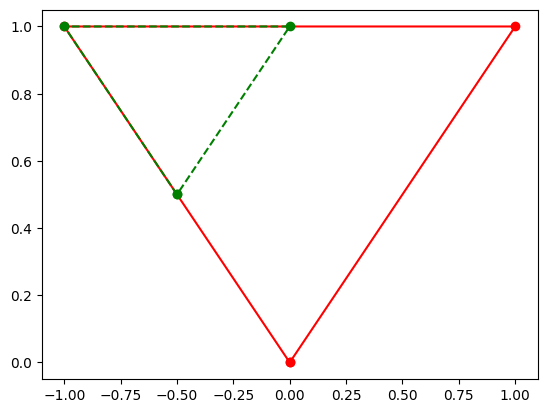

In [ ]:
xn = np.array( [[0,0],[-1,1], [1,1], [0,0]]) # points initiaux

# reflexion
xh = xn[0] # supposons que le premier points soit le plus mauvais des trois.
x0 = (xn[1]+xn[2])/2
alpha = 1
xr = x0 + alpha*(x0-xh)

# contraction si f(xr) est plus grande que les f(xi)
beta = 0.5
xc = beta*xh + (1-beta)*x0

# pour le tracé
xb = np.array([xn[0], x0, xr])
xg = np.array([xn[1], xc , xn[2]])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(x0[0],x0[1],'bo')
plt.plot(xr[0],xr[1],'kx')
plt.plot(xc[0],xc[1],'go')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xb[:,0],xb[:,1],'k--')
plt.show()

# si on ne trouve pas un resultat satisfaisant
# et si x2 est le sommet dont la fonction de cout est la plus faible
x1p = (xn[0]+xn[1])/2
x3p = (xn[2]+xn[1])/2

xg  =  np.array([x1p, xn[1], x3p, x1p])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xg[:,0],xg[:,1],'go')

plt.show()


## Expansion (n=2)

if there is an importante decrease to $x_r$, ie
$$f(x_r)<f(x_i) \forall i \in [1,n]$$
then build new $x_e$ so that
$$x_e = \gamma x_r +(1-\gamma)x_0$$ ou $\gamma = \frac{\Vert x_e-x_0 \Vert}{x_h-x_0}>1$

if $f(x_e) < \underset{x_i}{\min}f(x_i)$ then we keep $x_e$, else keep $x_r$


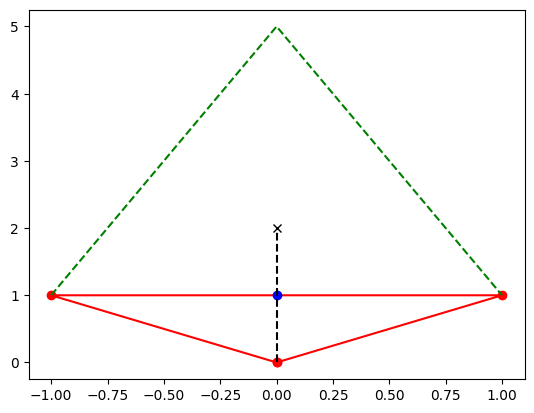

In [ ]:
xn = np.array( [[0,0],[-1,1], [1,1], [0,0]]) # points initiaux

# reflexion
xh = xn[0] # supposons que le premier points soit le plus mauvais des trois.
x0 = (xn[1]+xn[2])/2
alpha = 1
xr = x0 + alpha*(x0-xh)

# expansion
gamma = 4
xe = gamma*xr + (1-gamma)*x0

# pour le tracé
xb = np.array([xn[0], x0, xr])
xg = np.array([xn[1], xe , xn[2]])

plt.plot(xn[:,0],xn[:,1],'r-o')
plt.plot(x0[0],x0[1],'bo')
plt.plot(xr[0],xr[1],'kx')
plt.plot(xg[:,0],xg[:,1],'g--')
plt.plot(xb[:,0],xb[:,1],'k--')
plt.show()

**Algorithm**

* Let chose a simplex made of $x_i$ points
* Loop until $d>\varepsilon$, with $\varepsilon$ the desired tolerance
    * Try a reflexion and got $x_r$
    * if $f(x_r) < \min f(x_i)$,
        * keep $x_r$
        * try expansion, get $x_e$
            * if $f(x_e) < \min f(x_i)$, keep $x_e$
    * Else
        * If $f(x_r) > \max f(x_i)$
            * try contraction, get $x_c$
            * if $f(x_c) < \max f(x_i)$, keep the contraction
        * Else try a reduction of the simplex
* End
                  
    